In [9]:
import requests
import json

def get_repo_data(target_stars, date_since, file_name):
    """
    This block gets all the popular repo data from Github.
    """
    json_content = {'data': []}
    for i in xrange(1,11):
        url = 'https://api.github.com/search/repositories?q=created:%3E{}+stars:%3E{}&sort=stars&order=desc&per_page=100&page={}'.format(date_since, target_stars, i)
        res = requests.get(url)
        json_content['data'] += res.json()['items']
    #saves the data to a file in json format
    with open(file_name, 'w') as f:
        f.write(json.dumps(json_content, sort_keys=True, indent=4, separators=(',', ': ')))

In [10]:
"""
Test get repo data function
"""
def get_repo_master_data():
    """
    Defines what 'popular' for a repo means
    """
    target_stars = 5000
    date_since = '2000-11-06'
    file_name = 'repo_master_data_json.txt' # File where repo info is stored
    get_repo_data(target_stars, date_since, file_name)

In [11]:
# UNCOMMENT the line below to fetch info for popular repos

# get_repo_master_data()

In [12]:
file_name = 'repo_master_data_json.txt' # File where most popular repo info is stored

def test_popular_repos_file(file_name, num):
    with open(file_name, 'r') as f:
        data = json.load(f)
        print len(data['data'])
    print json.dumps(data['data'][num], sort_keys=True, indent=4, separators=(',', ': '))

# UNCOMMENT below to test any entry in the popular repos file    
    
# test_popular_repos_file(file_name, 0)

In [67]:
from configobj import ConfigObj

"""
Github API keys
"""

config = ConfigObj('config.ini')
client_id = 'afce9a3f1e25b3dcbe21'
client_secret = 'e290d1fa579e5a1138ab0d01477546e96c541819'

GITHUB_AUTH = '?client_id={}&client_secret={}'.format(client_id, client_secret)

In [ ]:
def get_repo_commit_data(file_name, repo_master_file_name):
    """
    Gets commit data for each repo inside the popular repos file
    """
    with open(repo_master_file_name, 'r') as f:
        master_data = json.load(f) # reads file with most popular repos into a dict
        commits_data = {}
        for repo in master_data['data']:
            # commits_url, name
            url = repo['commits_url']
            commits_url = url[:len(url)-6] + GITHUB_AUTH
            res = requests.get(commits_url)
            commits_data[repo['id']] = {'name': repo['name'], 'commits': res.json()}
            print repo['name'], len(commits_data), res.status_code

        # wirtes the commit_data dict to a file
        with open(file_name, 'w') as f:
            f.write(json.dumps(commits_data, sort_keys=True, indent=4, separators=(',', ': ')))

In [ ]:
# UNCOMMENT the line below to fetch commit info for popular repos

#get_repo_commit_data('repo_commit_data_json.txt', 'repo_master_data_json.txt')

In [ ]:
def test_count_commits_info_repos(file_name):
    with open(file_name, 'r') as f:
        commit_data = json.load(f)
        print len(commit_data)
        
# UNCOMMENT below to test the count
        
# file_name = 'repo_commit_data_json.txt'
# test_count_commits_info_repos(file_name)

In [ ]:

def get_repo_commit_data(file_name, repo_master_file_name):
    """
    Get all the contributor information
    """
    with open(repo_master_file_name, 'r') as f:
        master_data = json.load(f)
        contributor_data = {}
        for repo in master_data['data']:
            url = repo['contributors_url'] + GITHUB_AUTH
            res = requests.get(url)
            contributor_data[repo['id']] = {'name': repo['name'], 'contributors': res.json()}
            print repo['id'], repo['name'], len(contributor_data), res.status_code
        with open(file_name, 'w') as f:
            f.write(json.dumps(contributor_data, sort_keys=True, indent=4, separators=(',', ': ')))

In [ ]:
# UNCOMMENT the line below to fetch commit info for popular repos

#get_repo_commit_data('repo_contributor_data_json.txt', 'repo_master_data_json.txt')

In [74]:

def get_more_contributor_data(file_name, repo_master_file_name):
    """
    Get all the orgs of the contributors
    """
    with open(repo_master_file_name, 'r') as f:
        master_data = json.load(f)
        for repo_index in master_data:
            print 'repo ', repo_index
            repo = master_data[repo_index]
            i = 0
            for contributor in repo['contributors']:
                urls = ['events_url', 'followers_url', 'following_url', 'gists_url', 'organizations_url', 'received_events_url', 'repos_url', 'starred_url', 'subscriptions_url']
                for topic in urls:
                    url = contributor[topic] + GITHUB_AUTH
                    res = requests.get(url)
                    contributor[topic] = {topic: res.json()}
#                 print 'contrib after', contributor
                master_data[repo_index]['contributors'][i] = contributor
                i = i+1
            with open(file_name, 'w') as f:
                f.write(json.dumps(master_data[repo_index], sort_keys=True, indent=4, separators=(',', ': ')))

In [76]:
# got through repo 3228505 before giving up
get_more_contributor_data('repo_contributor_expanded.txt', 'repo_contributor_data_json.txt')

repo  29891188
repo  1062897
repo  642222
repo  597879
repo  25095239
repo  16965762
repo  3100121
repo  22374063
repo  29247444
repo  1305114
repo  45497910
repo  1864363
repo  301742
repo  48296
repo  1337658
repo  10187082
repo  41673581
repo  2349728
repo  3228505
repo  7544081
repo  16623069
repo  52113921
repo  45936895
repo  3678731
repo  23069399
repo  6007295
repo  26730195
repo  8575137
repo  20506004
repo  10894716
repo  30969188
repo  22607013
repo  59114705
repo  1607357
repo  40706
repo  34864402
repo  21648001
repo  3605299


KeyboardInterrupt: 

In [99]:
import pandas as pd
from pandas.io.json import json_normalize

language_file_path = "./repo_languages_json.txt"
repos = pd.read_json(language_file_path, orient="index")
#json_normalize(repos)
repos.reset_index(inplace=True)
repos.head()


,index,languages,name
0,10057936,"{u'Shell': 1621, u'HTML': 9682, u'Java': 48722...",picasso
1,10064545,"{u'TypeScript': 52, u'JavaScript': 350461, u'M...",systemjs
2,10187082,"{u'Shell': 89302, u'JavaScript': 585123, u'Mak...",pm2
3,10219106,"{u'HTML': 14599, u'JavaScript': 28445, u'CSS':...",mean
4,10270250,"{u'C': 5341, u'Shell': 525, u'Python': 9383, u...",react


In [101]:
for row in range(len(repos)):
    print row
    #First I load the dict (one at a time)
    n = repos.loc[row,'languages']
    print n
    #Now I make a new column that pulls out the data that I want.
    for key in n.keys():
        repos.loc[row, key] = n.get(key)

0
{u'Shell': 1621, u'HTML': 9682, u'Java': 487227, u'CSS': 3737}
1
{u'TypeScript': 52, u'JavaScript': 350461, u'Makefile': 4566, u'CoffeeScript': 59, u'HTML': 19065, u'CSS': 46}
2
{u'Shell': 89302, u'JavaScript': 585123, u'Makefile': 540, u'Smarty': 1658}
3
{u'HTML': 14599, u'JavaScript': 28445, u'CSS': 29}
4
{u'C': 5341, u'Shell': 525, u'Python': 9383, u'JavaScript': 2998821, u'Makefile': 189, u'C++': 44974, u'CoffeeScript': 11786, u'TypeScript': 15060}
5
{u'GLSL': 512, u'TypeScript': 1672, u'Java': 1550, u'VHDL': 830, u'Elm': 487, u'LiveScript': 5747, u'JavaScript': 11535688, u'Makefile': 5681, u'Perl': 678, u'Lua': 981, u'ABAP': 1037, u'Matlab': 203, u'Ada': 99, u'Haxe': 447, u'R': 2445, u'Erlang': 487, u'Forth': 979, u'D': 324, u'Scheme': 559, u'Assembly': 506, u'NSIS': 486, u'C#': 151, u'LSL': 2080, u'Eiffel': 375, u'Tcl': 899, u'Common Lisp': 632, u'Dart': 489, u'CoffeeScript': 403, u'Nix': 2212, u'HTML': 1278407, u'Cucumber': 699, u'Rust': 495, u'Elixir': 692, u'Ruby': 531, u'Pr

In [108]:
languages = repos.drop(['languages', 'index', 'name'], 1)
languages.head()

,Shell,HTML,Java,CSS,TypeScript,JavaScript,Makefile,CoffeeScript,Smarty,C,...,Inno Setup,Scilab,MAXScript,Eagle,RenderScript,Crystal,Frege,Puppet,CartoCSS,Arduino
0,1621.0,9682.0,487227.0,3737.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,19065.0,NaN,46.0,52.0,350461.0,4566.0,59.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,89302.0,NaN,NaN,NaN,NaN,585123.0,540.0,NaN,1658.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,14599.0,NaN,29.0,NaN,28445.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,525.0,NaN,NaN,NaN,15060.0,2998821.0,189.0,11786.0,NaN,5341.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
lang_totals = languages.sum()
lang_totals.sort_values(ascending=False, inplace=True)

Text(0,0.5,u'Bytes (in hundreds of millions)')


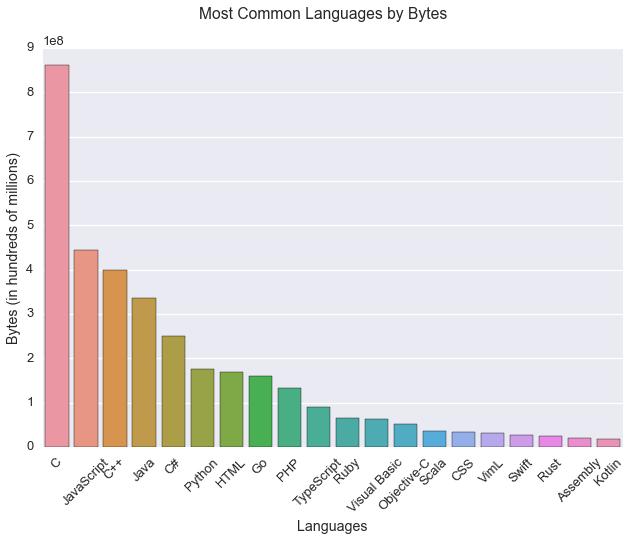

In [168]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sea
import numpy as np

largest = lang_totals.head(20)

# Most popular language by number of bytes of popular repos
sea.set_context('talk')
g = sea.barplot(x=largest.keys(), y=largest, ci=None)
g = plt.xticks(rotation=45)
g = plt.xlabel('Languages')
g = plt.ylabel('Bytes (in hundreds of millions)')
g.figure.suptitle('Most Common Languages by Bytes')
print g

JavaScript    504
HTML          433
Shell         377
CSS           369
Makefile      194
dtype: int64
Text(0,0.5,u'Number of Repos')


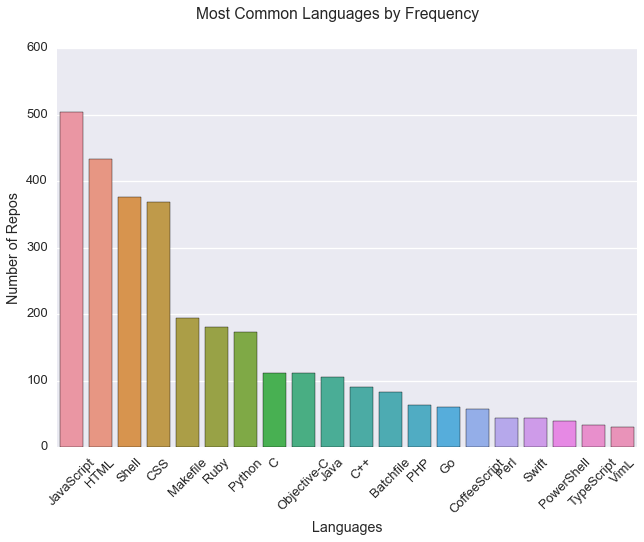

In [169]:
# Most popular languages by percent of popular repos
observations = languages.count()
observations.sort_values(ascending=False, inplace=True)
print observations.head()
most_common = observations.head(20)

g = sea.barplot(x=most_common.keys(), y=most_common, ci=None)
g = plt.xticks(rotation=45)
g = plt.xlabel('Languages')
g = plt.ylabel('Number of Repos')
g.figure.suptitle('Most Common Languages by Frequency')
print g